# DFS Demo: Exact Graph Coloring

This notebook demonstrates the DFS-based exact coloring on small and medium benchmark graphs.

In [1]:
# 1. Setup imports and module path
import sys, os
sys.path.insert(0, os.path.abspath('../src'))

from dfs_coloring import DFSColoring, load_graph
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# 2. Load graphs
small_path = '../data/benchmarks/test_small20.txt'
med_path = '../data/benchmarks/test_medium40.txt'
G_small = load_graph(small_path)
G_med = load_graph(med_path)
print(f"Small graph: {G_small.number_of_nodes()} nodes, {G_small.number_of_edges()} edges")
print(f"Medium graph: {G_med.number_of_nodes()} nodes, {G_med.number_of_edges()} edges")


Small graph: 20 nodes, 32 edges
Medium graph: 40 nodes, 65 edges


In [3]:
# 3. Run DFS on small graph
solver_small = DFSColoring(G_small)
best_k_small, coloring_small, time_small = solver_small.run()
print(f"Small graph chromatic number: {best_k_small} (time: {time_small:.3f}s)")


Small graph chromatic number: 3 (time: 0.000s)


In [4]:
# 4. Run DFS on medium graph
solver_med = DFSColoring(G_med)
best_k_med, coloring_med, time_med = solver_med.run()
print(f"Medium graph chromatic number: {best_k_med} (time: {time_med:.3f}s)")


Medium graph chromatic number: 3 (time: 0.000s)


## Visualization of Small Graph

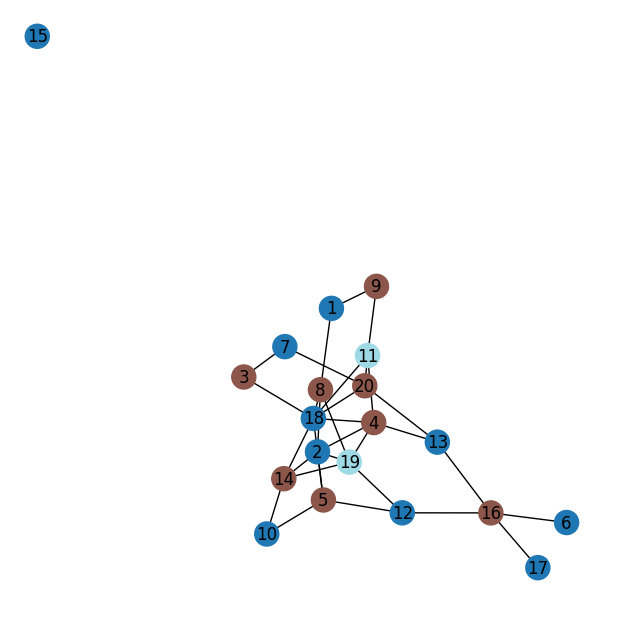

In [5]:
# 5. Visualize small graph coloring
pos = nx.spring_layout(G_small, seed=1)
colors = [coloring_small[n] for n in G_small.nodes()]
plt.figure(figsize=(6,6))
nx.draw(G_small, pos, with_labels=True, node_color=colors, cmap='tab20', node_size=300)
plt.show()


## Visualization of Medium Graph Partial View

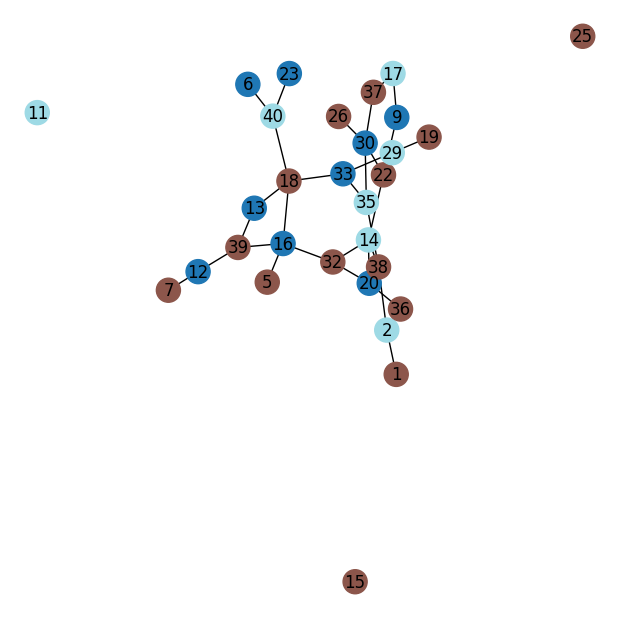

In [6]:
# 6. Visualize 30-node subgraph of medium graph
import random
nodes = random.sample(list(G_med.nodes()), 30)
subG = G_med.subgraph(nodes)
pos_sub = nx.spring_layout(subG, seed=2)
colors_sub = [coloring_med[n] for n in subG.nodes()]
plt.figure(figsize=(6,6))
nx.draw(subG, pos_sub, with_labels=True, node_color=colors_sub, cmap='tab20', node_size=300)
plt.show()
